In [12]:
#https://pythonprogramming.net/image-recognition-python/

In [ ]:
#http://guessthecorrelation.com/

For comparison:
* first image actual: .17
* secondimage actual: .5
* thirdiamge actual: .94

In [73]:
import numpy as np
import pandas as pd

import seaborn as sns
#Custom colormap to plot same image for confirmation
cmapz = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True, reverse=True)


import scipy as sp
from PIL import Image

In [70]:
def get_corr(filepath):
    #Open image from provided location (expecting PNG, but probably not necessary)
    i = Image.open(filepath)
    iar = np.asarray(i)  

    #Colors are stored per pixel in a length 3 string - take the average since this
    #is black and white
    overall_dict = {}
    for i in range(iar.shape[0]):
        row_list = []
        for j in range(iar.shape[1]):
            row_list.append(iar[i][j].mean())

        overall_dict[i] = row_list
    
    #Convert to data frame for manipulation
    df_image = pd.DataFrame(overall_dict)
    sns.heatmap(df_image, cmap=cmapz)
    df_mapped = df_image
    
    #Only look at values where grayscale is sufficiently close to black to identify 
    #a point vs. background image
    df_mapped = df_mapped.applymap(lambda x: 1 if x<200 else 0)
    x_list = []
    y_list = []
    #record coordinates of each point
    for x in range(df_mapped.shape[0]):
        for y in range(df_mapped.shape[1]):
            if df_mapped.iloc[x, y] ==1:
                x_list.append(x)
                y_list.append(y)
    #get correlation coefficient
    return abs(sp.stats.pearsonr(x_list, y_list)[0])

0.9448254322870503

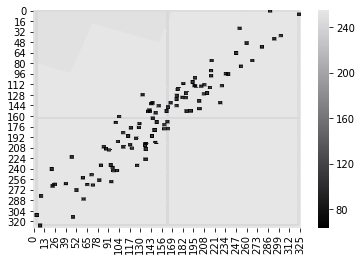

In [72]:
get_corr('./Images/thirdimage.png')